In [805]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [806]:
df = pd.read_csv(r"C:\Users\vipin\Downloads\tweets.csv")

In [807]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [665]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [668]:
df.label.value_counts(normalize = True)

label
0    0.744192
1    0.255808
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

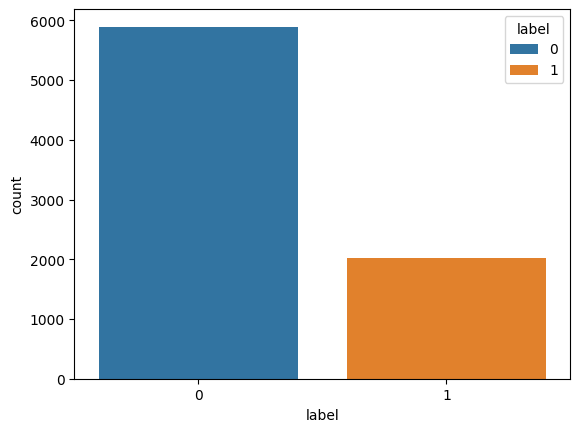

In [669]:
sns.countplot(x = 'label',data = df,hue = 'label')

In [670]:
# Check for the class balance
df['label'].value_counts()

label
0    5894
1    2026
Name: count, dtype: int64

In [671]:
import contractions


In [598]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [672]:
import nltk
from nltk.corpus import wordnet
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vipin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vipin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vipin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [673]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [674]:
# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ  # Adjective
    elif tag.startswith('V'):
        return wordnet.VERB  # Verb
    elif tag.startswith('N'):
        return wordnet.NOUN  # Noun
    elif tag.startswith('R'):
        return wordnet.ADV  # Adverb
    else:
        return wordnet.NOUN  # Default to noun



In [776]:
def tweet_cleaner__stopwords(text):
   # new_text = re.sub(r"'s\b", " is", text) # replaces "'s" with 'is'
    new_text = re.sub("#", "", text) # replaces "#" with ''
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text) # only retains alphabet and numbers
    new_text = re.sub(r"http\S+", "", new_text)   # removes hyperlink https
    new_text = contractions.fix(new_text)    #  reomves all 's    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    # only retai
    new_text = new_text.lower().strip()
    new_text = [token for token in new_text.split() if token not in ENGLISH_STOP_WORDS]
    new_text = [token for token in new_text if len(token)>2]     
    pos_tags = pos_tag(new_text) # will give a suitable tag like noun,verb,adj
    new_word = ' '
    for word,tag in pos_tags:
         wordnet_pos = get_wordnet_pos(tag)
         lemma = lemmatizer.lemmatize(word, pos=wordnet_pos)
         new_word = new_word + lemma + " "
    
    return new_word.strip()

In [676]:
df['clean_tweet'] = df['tweet'].apply(tweet_cleaner__stopwords)

In [677]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(df['clean_tweet'])


In [678]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, df['label'], test_size=0.25, stratify=df['label'], random_state=42,)


In [679]:
# Training model using LR
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score)  

0.969023569023569
0.8762626262626263


In [683]:
## L1-REGULARIZATION as the apbove model is overfitting
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)      


0.8877104377104377
0.8777777777777778


In [781]:
## leT'S Cross-Validate the Logistic Regression Model ?????
from sklearn.model_selection import cross_val_score, cross_validate

In [777]:
## crOSS VALIDATE THE LR1 model

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2)) 



[0.88194444 0.85984848 0.85795455 0.87689394 0.87752525]
87.08


In [783]:
## Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.,2, 0.5) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\vipin\anaconda3\envs\datascience\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vipin\anaconda3\envs\datascience\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vipin\anaconda3\envs\datascience\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\vipin\anaconda3\envs\datascience\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_paramete

In [790]:
grid_results.best_params_

{'C': np.float64(1.5)}

In [792]:
## L1-REGULARIZATION using best parameter
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1',C =1.5) 
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)  

# we are seeing overfitting here


0.9447811447811448
0.8767676767676768


In [793]:
## L1-REGULARIZATION chose a paramter value with less variability
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1',C =.5) 
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)      


0.8947811447811448
0.8762626262626263


In [794]:
## L1-REGULARIZATION
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1',C =.4) 
LR1.fit(X_train, y_train)
y_pred =LR1.predict(X_test)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)      


0.8877104377104377
0.8777777777777778


In [780]:
## cross  validating THE LR1 model

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)
results = cross_val_score(LR1, X, y, cv=10, scoring='accuracy')
print(results)
print('AVERAGE CV SCORE',np.round((results.mean())*100, 2)) 



[0.86994949 0.875      0.87247475 0.88383838 0.87121212 0.88005051
 0.87878788 0.86994949 0.86111111 0.88005051]
AVERAGE CV SCORE 87.42


In [804]:
## cross  validating THE LR1 model

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)
results = cross_validate(LR1, X, y, cv=10, scoring=['accuracy', 'precision', 'recall'])
print('test_mean_accuracy',np.mean(results['test_accuracy']))
print('test_mean_precision',np.mean(results['test_precision']))
print('test_mean_recall',np.mean(results['test_recall']))
#print('AVERAGE CV SCORE',np.round((results.mean())*100, 2)) 



test_mean_accuracy 0.8742424242424243
test_mean_precision 0.7011733605828149
test_mean_recall 0.8874628103204409
